In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### set random_seed

In [2]:
SEED = 0

### definition of data and errors

- data 

    - data is generated from a joint distribution $p(\mathbf{x}, y)$

    $$
    (\mathbf{x}, y) \sim p(\mathbf{x}, y)
    $$

    - whole data set

    $$
    D_{rs} = \{(\mathbf{x}_{i}, y_{i})|i = 1, \cdots, N = N_{r} + N_{s}\}
    $$

    - train data

    $$
    D_{r} = \{(\mathbf{x}_{i}, y_{i})|i = 1, \cdots, N_{r}\}
    $$

    - test data

    $$
    D_{s} = \{(\mathbf{x}_{i}, y_{i})|i = N_{r} + 1, \cdots, N_{r} + N_{s}\}
    $$

- fit model using the train data D_{r}

$$
\hat{y}_{D_{r}}
$$

- train error

$$
\begin{align}
E_{train} & = & \mathbb{E}_{D_{r}}[E(\hat{y}_{D_{r}}(\mathbf{x}), y)]\\
& = & \frac{1}{N_{r}}\sum^{N_{r}}_{i=1} E(\hat{y}_{D_{r}}(\mathbf{x}_{i}), y_{i})
\end{align}
$$

- test error

$$
\begin{align}
E_{test} & = & \mathbb{E}_{D_{s}}[E(\hat{y}_{D_{r}}(\mathbf{x}), y)]\\
& = & \frac{1}{N_{s}}\sum^{N_{r}+N_{s}}_{i=N_{r}+1} E(\hat{y}_{D_{r}}(\mathbf{x}_{i}), y_{i})
\end{align}
$$

- Expected generalization error

$$
\begin{align}
(\mathbf{x}_{\star}, y_{\star}) & \sim & p(\mathbf{x}, y)\\
E_{new} & = & \mathbb{E}_{\star}[E(\hat{y}_{D_{r}}(\mathbf{x}_{\star}), y_{\star})]
\end{align}
$$



### cross validation

- k-fold cross-validation

    - At the $l$th fold
    
        - train data : $D^{(l)}_{r}$
        - validation data : $D^{(l)}_{v} = D_{r} - D^{(l)}_{r}$

    - $l$th fold train error
    
    $$
    E^{(l)}_{train} = \mathbb{E}_{D^{(l)}_{r}}[E(\hat{y}_{D^{(l)}_{r}}(\mathbf{x}), y)]
    $$

    - $l$th fold validation error

    $$
    E^{(l)}_{val} = \mathbb{E}_{D^{(l)}_{v}}[E(\hat{y}_{D^{(l)}_{r}}(\mathbf{x}), y)]
    $$

- average fitted model

$$
\hat{f}_{D_{r}}(\mathbf{x}) 
= \mathbb{E}_{l}
    \big[
        \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
    \big]
= \frac{1}{k}\sum_{l=1}^{k} \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
$$


### bias-variance decomposition

- bias-variance decomposition of error using $(\mathbf{x}, y) \in D^{(l)}_{v}$
    - noise
$$
\begin{eqnarray}
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
          + \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
    \Big]
\Big]\\
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
     \Big]
\Big]\\
&&
\qquad + 2
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)
     \Big]
\Big]\\
&&
\qquad +
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
     \Big]
\Big]
\end{eqnarray}
$$

    - variance
$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
     \Big]
\Big]
$$
    - cross noise
$$
2\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)
     \Big]
\Big]
$$
    - bias (+ irreducible noise)
$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
     \Big]
\Big]
$$
    
    - The cross noise does not vanish
        - due to the correlation with average model, which is made of validation data

$$
\\
\\
$$

- bias-variance decomposition of error using $(\mathbf{x}, y) \in D_{s}$

$$
\begin{eqnarray}
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
    \Big]
\Big]\\
&&
\qquad +
\mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
    \big(
        \hat{f}_{D_{r}}(\mathbf{x})
      - y
    \big)^{2}
\Big]
\end{eqnarray}
$$

    - variance

$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
    \Big]
\Big]
$$

    - bias (+ irreducible noise)

$$
\mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
    \big(
        \hat{f}_{D_{r}}(\mathbf{x})
      - y
    \big)^{2}
\Big]
$$

   - The cross noise does vanish
    

### things to be concerned
- maybe the irreducible noise is not uniform over x.
    - true model
$$
y = f_{0}(\mathbf{x}) + \epsilon(\mathbf{x})
$$

- maybe the irreducible noise is uniform but not normal
    - true model
$$
\epsilon \quad not \sim Normal(0, \sigma^{2})
$$
    - if one wants to estimate bias and variance at a specific point among test data 

### generate dataset

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def compute_noises_with_cv(estimator, X_train, y_train, X_test, y_test, cv, seed):
    y_preds_train, y_preds_test, trains, vals = [], [], [], []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, val) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])

        y_preds_train.append(model.predict(X_train))
        y_preds_test.append(model.predict(X_test))

        trains.append(train)
        vals.append(val)

    y_pred_train_mean = np.array(y_preds_train).mean(axis=0)
    y_pred_test_mean = np.array(y_preds_test).mean(axis=0)

    return [compute_noises(y_pred_train[train],
                           y_pred_train_mean[train],
                           y_train[train])\
          + compute_noises(y_pred_train[val],
                           y_pred_train_mean[val],
                           y_train[val])\
          + compute_noises(y_pred_test,
                           y_pred_test_mean,
                           y_test)
          for y_pred_train, y_pred_test, train, val
              in zip(y_preds_train, y_preds_test, trains, vals)]

def compute_noises(y_pred, y_pred_mean, y_true):
    return [compute_variance(y_pred, y_pred_mean),
            compute_cross_noise(y_pred, y_pred_mean, y_true),
            compute_bias(y_pred_mean, y_true),
            compute_total_noise(y_pred, y_true)]

def compute_variance(y_pred, y_pred_mean):
    return compute_ms(y_pred - y_pred_mean)

def compute_bias(y_pred_mean, y_true):
    return compute_ms(y_pred_mean - y_true)

def compute_cross_noise(y_pred, y_pred_mean, y_true):
    return 2 * ((y_pred - y_pred_mean) * (y_pred_mean - y_true)).mean()

def compute_total_noise(y_pred, y_true):
    return compute_ms(y_pred - y_true)

def compute_ms(x):
    return (x**2).mean()


In [25]:
def check_noise_diff(df_errors, hp, kind="train"):
    if type(hp)==str: hp = [hp]
    cols = hp + ["seed", "fold"]\
            + [f"variance_{kind}",
               f"cross_{kind}",
               f"bias_{kind}",
               f"error_{kind}"]
    res = df_errors[cols].copy()
    res[f"diff_error_sum"] = res[f"error_{kind}"]\
                           - res[[f"variance_{kind}",\
                                  f"cross_{kind}",\
                                  f"bias_{kind}"]].sum(axis=1)
    return cols, res

def marginalize_out_folds(res, hp):
    if type(hp)==str: hp = [hp]
    res1 = res.groupby(hp + ["seed"]).mean().reset_index()
    res1.drop(columns="fold", axis=1, inplace=True)
    return res1

def marginalize_out_seeds_folds(res, hp):
    if type(hp)==str: hp = [hp]
    res2 = res.groupby(hp).mean().reset_index()
    res2.drop(columns=["seed", "fold"], axis=1, inplace=True)
    return res2

In [37]:
from sklearn.linear_model import Ridge

def main(cv, seeds, alphas):
    data = []
    for alpha in alphas:
        estimator = Ridge(alpha=alpha)
        for seed in seeds:
            X_train, X_test, y_train, y_test =\
                train_test_split(X, y, test_size=0.20, random_state=seed)
            errors = compute_noises_with_cv(estimator, X_train, y_train, X_test, y_test, cv, seed)
            data.extend([[alpha, seed, k] + errs for k, errs in enumerate(errors)])

    return pd.DataFrame(data, columns=["alpha", "seed", "fold", 
                        "variance_train", "cross_train", "bias_train", "error_train",
                        "variance_val", "cross_val","bias_val", "error_val",
                        "variance_test", "cross_test", "bias_test", "error_test"])

def summarise(df_errors, hp="alpha"):
#     kinds = ["train", "val", "test"]
    kinds = ["test"]
    for kind in kinds:
        fig, axs = plt.subplots(1, 5, figsize=(15, 2))
        cols, res0 = check_noise_diff(df_errors, hp=hp, kind=kind)
        print("no marginalization")
        display(res0.head(3))
        cols = cols[3:] + ["diff_error_sum"]
        for i, col in enumerate(cols):
            res0[res0["alpha"]==alphas[0]][col].plot(ax=axs[i], legend=False, kind='hist', title=col)
        plt.tight_layout()
        plt.show()

        fig, axs = plt.subplots(1, 5, figsize=(15, 2))
        res1 = marginalize_out_folds(res0, hp)
        print("marginalizing out folds")
        display(res1.head(3))
        for i, col in enumerate(cols):
            res1[res1["alpha"]==alphas[0]][col].plot(ax=axs[i], legend=False, kind='hist', title=col)
        plt.tight_layout()
        plt.show()

        res2 = marginalize_out_seeds_folds(res0, hp)
        print("marginalizing out seeds and folds")
        display(res2)

        print("\n" * 3)
        return res0, res1, res2

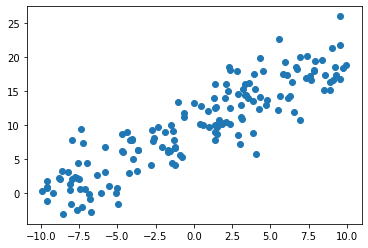

In [39]:
def generate_dataset(n, seed=SEED):
    np.random.seed(seed)
    xs = np.random.uniform(low=-10, high=10, size=n)
    err = np.random.normal(loc=0.0, scale=3.0, size=n)
    ys = xs + 10 + err
    return xs[:, np.newaxis], ys, err

n = int((2**7) * 1.25)
X, y, err = generate_dataset(n)
plt.scatter(X, y);

no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.000640,-0.036855,8.609338,8.573122,1.776357e-15
1,0.001,0,1,0.001246,-0.096424,8.609338,8.514161,0.000000e+00
2,0.001,0,2,0.002466,0.113086,8.609338,8.724891,0.000000e+00


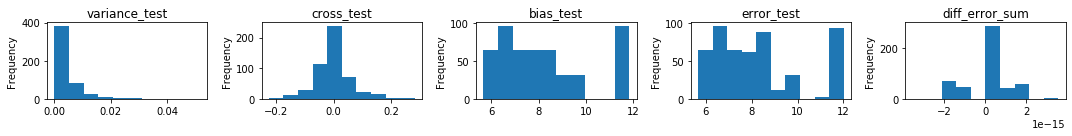

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.005791,-1.539567e-16,8.609338,8.615129,-4.440892e-16
1,0.001,1,0.004264,6.003878e-15,8.086896,8.091160,1.110223e-16
2,0.001,2,0.003448,6.960578e-16,7.070796,7.074244,2.775558e-16


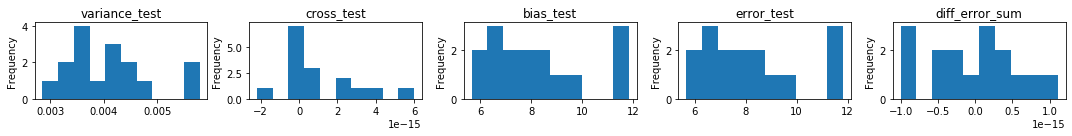

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.004094,1.069660e-15,8.241388,8.245482,-4.857226e-17
1,0.010,0.004094,-1.009846e-15,8.241386,8.245480,2.099015e-16
2,0.100,0.004094,-7.402932e-16,8.241366,8.245460,-1.214306e-16
3,1.000,0.004093,5.638258e-16,8.241170,8.245263,1.561251e-17
4,10.000,0.004082,-3.545341e-16,8.239385,8.243467,2.602085e-16
5,100.000,0.003987,3.374579e-16,8.238447,8.242434,1.769418e-16
6,1000.000,0.003789,7.856942e-16,9.308969,9.312758,1.838807e-16


In [40]:
cv = 4
seeds = list(range(16))
alphas = np.power(10.0, np.arange(-3, 4, 1))
df04 = main(cv, seeds, alphas)
res0, res1, res2 = summarise(df_errors, hp="alpha")

no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.006556,0.198441,8.602507,8.807504,1.776357e-15
1,0.001,0,1,0.047376,0.537394,8.602507,9.187277,0.000000e+00
2,0.001,0,2,0.009349,-0.141453,8.602507,8.470402,1.776357e-15


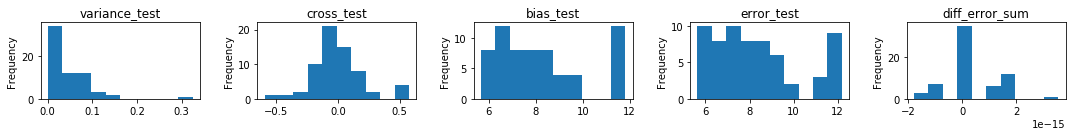

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.032470,3.053113e-16,8.602507,8.634977,8.881784e-16
1,0.001,1,0.039858,5.100087e-16,8.084782,8.124641,0.000000e+00
2,0.001,2,0.019565,-7.650131e-16,7.070711,7.090276,-4.440892e-16


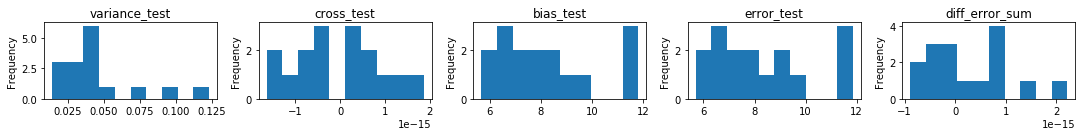

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.046025,-2.125036e-17,8.242060,8.288085,2.914335e-16
1,0.010,0.046025,4.336809e-19,8.242058,8.288083,3.330669e-16
2,0.100,0.046023,2.432950e-16,8.242032,8.288055,1.249001e-16
3,1.000,0.046008,-3.773024e-17,8.241778,8.287786,3.747003e-16
4,10.000,0.045854,-4.336809e-18,8.239536,8.285390,4.163336e-17
5,100.000,0.044525,1.940722e-16,8.245110,8.289635,-5.551115e-17
6,1000.000,0.042298,1.193707e-16,9.887954,9.930252,2.775558e-17






no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.060978,0.233737,8.611562,8.906277,0.000000e+00
1,0.001,0,1,0.071392,-0.060190,8.611562,8.622764,0.000000e+00
2,0.001,0,2,0.014331,-0.274562,8.611562,8.351330,1.776357e-15


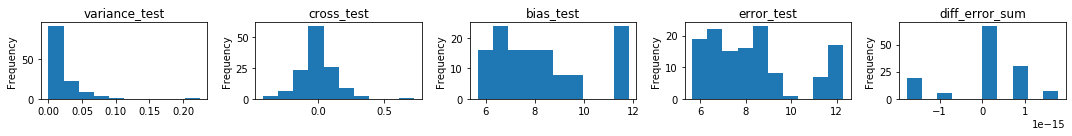

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.031980,-5.134781e-16,8.611562,8.643542,6.661338e-16
1,0.001,1,0.029728,1.526557e-16,8.086375,8.116103,1.110223e-16
2,0.001,2,0.015199,3.512815e-16,7.069930,7.085129,4.440892e-16


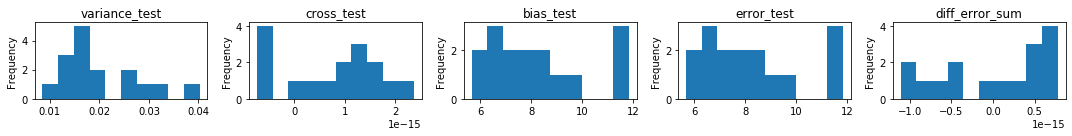

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.020008,7.463648e-16,8.241730,8.261739,6.938894e-18
1,0.010,0.020008,-6.591949e-17,8.241728,8.261736,6.245005e-17
2,0.100,0.020008,-1.935301e-16,8.241706,8.261714,4.857226e-17
3,1.000,0.020002,1.411631e-16,8.241488,8.261490,-1.457168e-16
4,10.000,0.019949,-7.432206e-17,8.239527,8.259476,-1.179612e-16
5,100.000,0.019486,-6.320899e-17,8.240592,8.260078,9.714451e-17
6,1000.000,0.018906,-4.521123e-16,9.514402,9.533308,1.873501e-16






no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.003258,-0.138423,8.610338,8.475172,0.000000e+00
1,0.001,0,1,0.077575,0.354013,8.610338,9.041925,1.776357e-15
2,0.001,0,2,0.020853,-0.171959,8.610338,8.459231,0.000000e+00


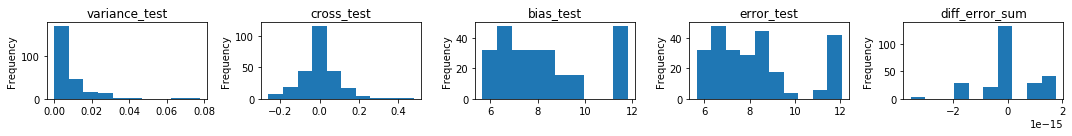

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.015533,5.447032e-16,8.610338,8.625870,3.330669e-16
1,0.001,1,0.011890,4.874573e-16,8.087058,8.098948,1.276756e-15
2,0.001,2,0.006380,7.303186e-16,7.070645,7.077024,-7.216450e-16


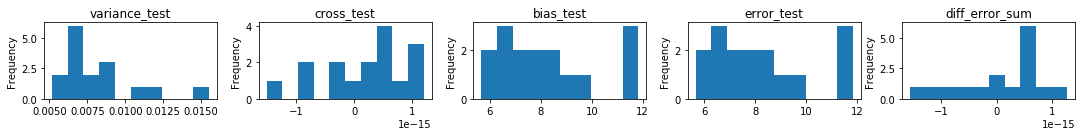

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.008189,1.678074e-16,8.241522,8.249711,7.285839e-17
1,0.010,0.008189,-1.605974e-16,8.241520,8.249708,7.979728e-17
2,0.100,0.008188,-3.062600e-16,8.241499,8.249688,5.204170e-17
3,1.000,0.008186,1.190996e-16,8.241296,8.249483,-1.526557e-16
4,10.000,0.008165,1.147086e-16,8.239456,8.247621,-5.898060e-17
5,100.000,0.007976,2.368982e-16,8.239098,8.247075,6.245005e-17
6,1000.000,0.007742,9.278060e-17,9.371940,9.379681,-5.898060e-17






no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.000640,-0.036855,8.609338,8.573122,1.776357e-15
1,0.001,0,1,0.001246,-0.096424,8.609338,8.514161,0.000000e+00
2,0.001,0,2,0.002466,0.113086,8.609338,8.724891,0.000000e+00


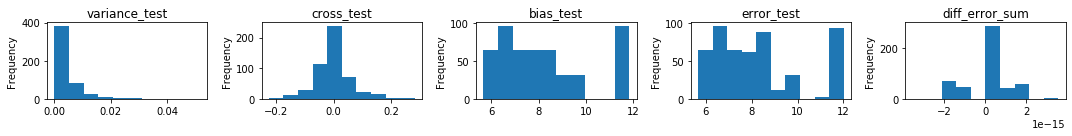

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.005791,-1.539567e-16,8.609338,8.615129,-4.440892e-16
1,0.001,1,0.004264,6.003878e-15,8.086896,8.091160,1.110223e-16
2,0.001,2,0.003448,6.960578e-16,7.070796,7.074244,2.775558e-16


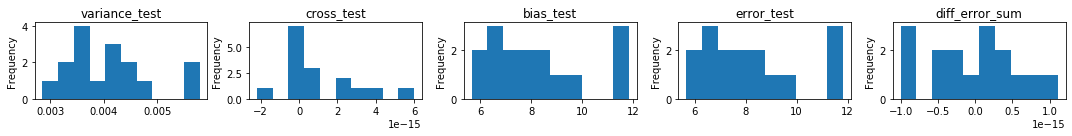

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.004094,1.069660e-15,8.241388,8.245482,-4.857226e-17
1,0.010,0.004094,-1.009846e-15,8.241386,8.245480,2.099015e-16
2,0.100,0.004094,-7.402932e-16,8.241366,8.245460,-1.214306e-16
3,1.000,0.004093,5.638258e-16,8.241170,8.245263,1.561251e-17
4,10.000,0.004082,-3.545341e-16,8.239385,8.243467,2.602085e-16
5,100.000,0.003987,3.374579e-16,8.238447,8.242434,1.769418e-16
6,1000.000,0.003789,7.856942e-16,9.308969,9.312758,1.838807e-16






no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.000003,0.001756,8.609134,8.610893,0.000000e+00
1,0.001,0,1,0.000582,-0.038218,8.609134,8.571498,-1.776357e-15
2,0.001,0,2,0.000486,0.014856,8.609134,8.624476,0.000000e+00


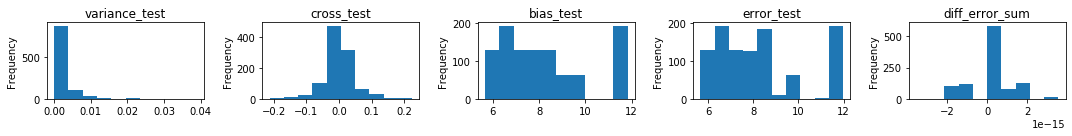

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.002596,1.131907e-15,8.609134,8.611729,-1.193490e-15
1,0.001,1,0.002015,4.587991e-15,8.086924,8.088939,1.526557e-16
2,0.001,2,0.001682,-1.398621e-16,7.070832,7.072514,-6.938894e-17


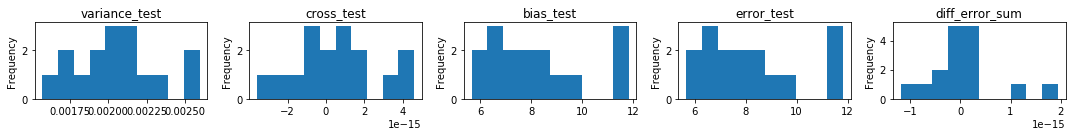

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.002058,6.127978e-16,8.241349,8.243407,5.551115e-17
1,0.010,0.002058,-3.040509e-17,8.241347,8.243405,-2.125036e-16
2,0.100,0.002058,8.226791e-16,8.241327,8.243385,1.726050e-16
3,1.000,0.002057,4.553785e-16,8.241134,8.243192,6.071532e-18
4,10.000,0.002052,3.525690e-16,8.239376,8.241428,-1.908196e-16
5,100.000,0.002005,1.076037e-16,8.238182,8.240186,-8.847090e-17
6,1000.000,0.001895,-7.324700e-16,9.279437,9.281332,3.903128e-17






no marginalization


,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0,0.000012,-0.009074,8.609043,8.599982,0.0
1,0.001,0,1,0.000023,0.010764,8.609043,8.619830,0.0
2,0.001,0,2,0.001261,-0.048073,8.609043,8.562231,0.0


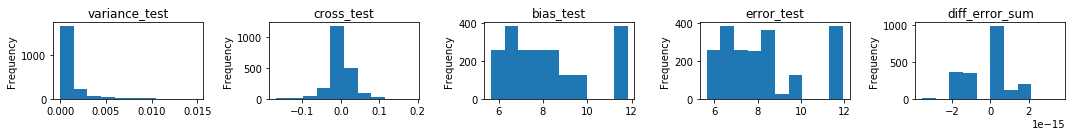

marginalizing out folds


,alpha,seed,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0,0.001037,1.169746e-15,8.609043,8.610080,-5.134781e-16
1,0.001,1,0.001011,-9.365481e-15,8.086982,8.087993,-1.589007e-15
2,0.001,2,0.000847,-1.174821e-15,7.070812,7.071659,-5.759282e-16


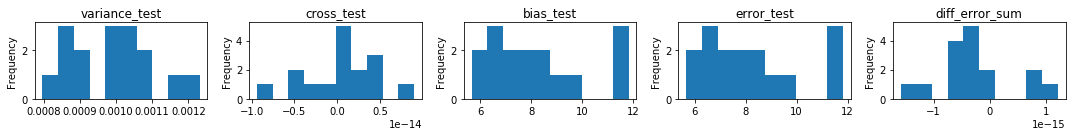

marginalizing out seeds and folds


,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum
0,0.001,0.000992,5.767769e-16,8.241334,8.242326,-2.597748e-16
1,0.010,0.000992,-9.421700e-16,8.241332,8.242324,-6.635317e-17
2,0.100,0.000992,-8.966725e-16,8.241313,8.242305,-9.150666e-17
3,1.000,0.000992,1.385937e-15,8.241121,8.242113,-1.192622e-16
4,10.000,0.000990,9.837441e-16,8.239376,8.240366,-7.589415e-17
5,100.000,0.000969,-1.068191e-15,8.238058,8.239026,6.548581e-17
6,1000.000,0.000935,4.504437e-16,9.265094,9.266029,-2.385245e-17


In [48]:
seeds = list(range(16))
alphas = np.power(10.0, np.arange(-3, 4, 1))
cvs = np.power(2, np.arange(2, 8))
df_res = []
for cv in cvs:
    df_errors = main(cv, seeds, alphas)
    _, _, res = summarise(df_errors, hp="alpha")
    res["cv"] = cv
    df_res.append(res)

df_res = pd.concat(df_res, axis=0)

In [49]:
df_res.shape

(42, 7)

In [57]:
df_res[df_res["cv"]==128]

,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum,cv
0,0.001,0.000992,5.767769e-16,8.241334,8.242326,-2.597748e-16,128
1,0.010,0.000992,-9.421700e-16,8.241332,8.242324,-6.635317e-17,128
2,0.100,0.000992,-8.966725e-16,8.241313,8.242305,-9.150666e-17,128
3,1.000,0.000992,1.385937e-15,8.241121,8.242113,-1.192622e-16,128
4,10.000,0.000990,9.837441e-16,8.239376,8.240366,-7.589415e-17,128
5,100.000,0.000969,-1.068191e-15,8.238058,8.239026,6.548581e-17,128
6,1000.000,0.000935,4.504437e-16,9.265094,9.266029,-2.385245e-17,128


In [56]:
df_res[df_res["cv"]==64]

,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum,cv
0,0.001,0.002058,6.127978e-16,8.241349,8.243407,5.551115e-17,64
1,0.010,0.002058,-3.040509e-17,8.241347,8.243405,-2.125036e-16,64
2,0.100,0.002058,8.226791e-16,8.241327,8.243385,1.726050e-16,64
3,1.000,0.002057,4.553785e-16,8.241134,8.243192,6.071532e-18,64
4,10.000,0.002052,3.525690e-16,8.239376,8.241428,-1.908196e-16,64
5,100.000,0.002005,1.076037e-16,8.238182,8.240186,-8.847090e-17,64
6,1000.000,0.001895,-7.324700e-16,9.279437,9.281332,3.903128e-17,64


In [55]:
df_res[df_res["cv"]==16]

,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum,cv
0,0.001,0.008189,1.678074e-16,8.241522,8.249711,7.285839e-17,16
1,0.010,0.008189,-1.605974e-16,8.241520,8.249708,7.979728e-17,16
2,0.100,0.008188,-3.062600e-16,8.241499,8.249688,5.204170e-17,16
3,1.000,0.008186,1.190996e-16,8.241296,8.249483,-1.526557e-16,16
4,10.000,0.008165,1.147086e-16,8.239456,8.247621,-5.898060e-17,16
5,100.000,0.007976,2.368982e-16,8.239098,8.247075,6.245005e-17,16
6,1000.000,0.007742,9.278060e-17,9.371940,9.379681,-5.898060e-17,16


In [54]:
df_res[df_res["cv"]==4]

,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum,cv
0,0.001,0.046025,-2.125036e-17,8.242060,8.288085,2.914335e-16,4
1,0.010,0.046025,4.336809e-19,8.242058,8.288083,3.330669e-16,4
2,0.100,0.046023,2.432950e-16,8.242032,8.288055,1.249001e-16,4
3,1.000,0.046008,-3.773024e-17,8.241778,8.287786,3.747003e-16,4
4,10.000,0.045854,-4.336809e-18,8.239536,8.285390,4.163336e-17,4
5,100.000,0.044525,1.940722e-16,8.245110,8.289635,-5.551115e-17,4
6,1000.000,0.042298,1.193707e-16,9.887954,9.930252,2.775558e-17,4


In [50]:
df_res[df_res["alpha"]==alphas[0]]

,alpha,variance_test,cross_test,bias_test,error_test,diff_error_sum,cv
0,0.001,0.046025,-2.125036e-17,8.242060,8.288085,2.914335e-16,4
0,0.001,0.020008,7.463648e-16,8.241730,8.261739,6.938894e-18,8
0,0.001,0.008189,1.678074e-16,8.241522,8.249711,7.285839e-17,16
0,0.001,0.004094,1.069660e-15,8.241388,8.245482,-4.857226e-17,32
0,0.001,0.002058,6.127978e-16,8.241349,8.243407,5.551115e-17,64
0,0.001,0.000992,5.767769e-16,8.241334,8.242326,-2.597748e-16,128


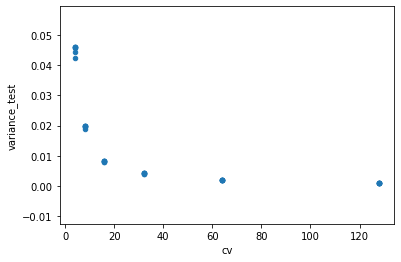

In [51]:
df_res.plot.scatter(x="cv", y="variance_test")

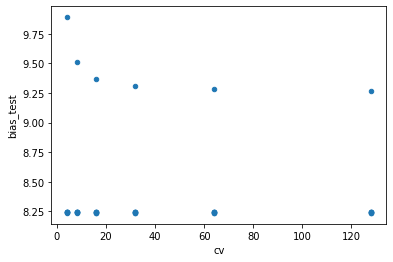

In [52]:
df_res.plot.scatter(x="cv", y="bias_test")

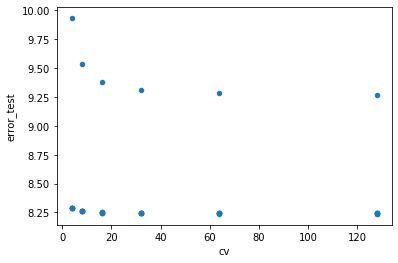

In [53]:
df_res.plot.scatter(x="cv", y="error_test")